# Linear regression
Regression analysis tries to explain relationships between variables. One of these variables, called dependend variable, is what we want to "explain" using one or more *explanatory variables*. In linear regression we assume that the dependent variable can be, approximately, expressed as a linear combination of the explanatory variables. As a simple example, we might have dependent variable height and an explanatory variable age. The age of a person can quite well explain the height of a person, and this relationship is approximately linear for kids (ages between 1 and 16). Another way of thinking about regression is fitting a curve to the observed data points. If we have only one explanatory variable, then this is easy to visualize.

We can apply the linear regression easily with scikit-learn package. Let's go through some examples.

First make the usual standard imports.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn   # This imports the scikit-learn library

Then we create some data with axpproximately the relationship $y=4*x+1$, with normally distributed errors.

In [85]:
np.random.seed(0)
n=20   # Number of data points
x=np.linspace(0, 10, n)
y=x*2 + 1 + 1*np.random.randn(n) # Standard deviation 2
print(x)
print(y)

[ 0.          0.52631579  1.05263158  1.57894737  2.10526316  2.63157895
  3.15789474  3.68421053  4.21052632  4.73684211  5.26315789  5.78947368
  6.31578947  6.84210526  7.36842105  7.89473684  8.42105263  8.94736842
  9.47368421 10.        ]
[ 2.76405235  2.45278879  4.08400114  6.39878794  7.07808431  5.28588001
  8.26587789  8.21706384  9.31783378 10.88428271 11.67035936 14.03322088
 14.39261667 14.80588554 16.18070534 17.12314801 19.33618434 18.68957858
 20.26043612 20.14590426]


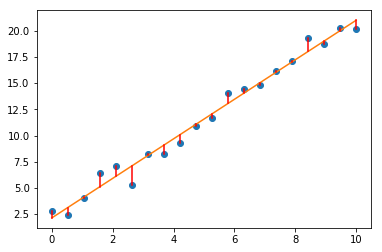

In [86]:
plt.plot(x,y, 'o')
from sklearn.linear_model import LinearRegression
model=LinearRegression(fit_intercept=True)
model.fit(x[:,np.newaxis], y)
xfit=np.linspace(0,10,100)
yfit=model.predict(xfit[:, np.newaxis])
plt.plot(xfit,yfit)
# The following will draw as many line segments as there are columns in matrices x and y
plt.plot(np.vstack([x,x]), np.vstack([y, model.predict(x[:, np.newaxis])]), color="red");

The linear regression tries to minimize the sum of squared errors $\sum_i (y[i] - \hat{y}[i])^2$; this is the sum of the lengths of the red line segments in the above plot.

In [87]:
print("Parameters:", model.coef_, model.intercept_)
print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)

Parameters: [1.88627741] 2.1379475205341283
Coefficient: 1.8862774144823018
Intercept: 2.1379475205341283


Note that in scikit-learn the attributes of the model that store the learned parameters have always an underscore at the end of the name. This applies to all algorithms in sklearn, not only the linear regression. This naming style allows one to easily spot the learned model parameters from other attributes.

The parameters estimated by the regression algorithm were quite close to the parameters that generated the data: coefficient 2 and intercept 1. Try experimenting with the number of data points and/or the standard deviation, to see if you can improve the estimated parameters.

## Multiple features

The previous example had only one explanatory variable. Sometimes this is called a simple linear regression. The next example illustrates a more complex regression with multiple explanatory variables.

In [156]:
x1=np.array([1,2,3])   # The three explanatory variables have values 1, 2, and 3, respectively
x2=np.array([4,5,6])   # Another example of values of explanatory variables
x3=np.array([7,8,10])   # ...
y=np.array([15,39,66]) + np.random.randn(3)   # For values 1,2, and 3 of explanatory variables, the value y=4 was observed, and so on.

Let's try to fit a linear model to these points:

In [157]:
model2=LinearRegression(fit_intercept=False)
x=np.vstack([x1,x2,x3])
model2.fit(x, y)
model2.coef_, model2.intercept_

(array([ 0.39144641, 10.78916472, -2.37581429]), 0.0)

In [160]:
b=model2.coef_[:, np.newaxis]
print("x:\n", x)
print("b:\n", b)
print("y:\n", y)
np.matmul(x, b)

x:
 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8 10]]
b:
 [[ 0.39144641]
 [10.78916472]
 [-2.37581429]]
y:
 [14.84233298 41.2567235  65.29529972]


array([[14.84233298],
       [41.2567235 ],
       [65.29529972]])

## Polynomial regression
It may perhaps come as a surprise that one can fit a polynomial curve to data points
using linear regression. The trick is to add new explanatory variables to the model.
Below we have a single feature x with associated y values given by third degree polynomial,
with some (gaussian) noise added. It is clearn from the plot that we cannot explain the data well with a linear function. We add two new features: $x^2$ and $x^3$. Now the model has three explanatory variables, $x, x^2$ and $x^3$. The linear regression will find the coefficients for these variables.

(array([  8.68433044, -19.81058771,   0.14834142]), -1021.2761394728586)

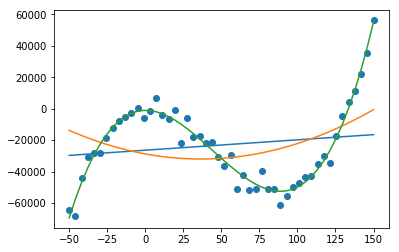

In [165]:
import matplotlib.pyplot as plt
x=np.linspace(-50,150,50)
y=0.15*x**3 - 20*x**2 + 5*x - 4 + 5000*np.random.randn(50)
plt.scatter(x, y)
model_linear=LinearRegression(fit_intercept=True)
model_squared=LinearRegression(fit_intercept=True)
model_cubic=LinearRegression(fit_intercept=True)
x2=x**2
x3=x**3
model_linear.fit(np.vstack([x]).T, y)
model_squared.fit(np.vstack([x,x2]).T, y)
model_cubic.fit(np.vstack([x,x2,x3]).T, y)
xf=np.linspace(-50,150, 50)
yf_linear=model_linear.predict(np.vstack([x]).T)
yf_squared=model_squared.predict(np.vstack([x,x2]).T)
yf_cubic=model_cubic.predict(np.vstack([x,x2,x3]).T)
plt.plot(xf,yf_linear)
plt.plot(xf,yf_squared)
plt.plot(xf,yf_cubic)

model_cubic.coef_, model_cubic.intercept_

Linear and squared are not enough to explain the data, but the linear regression manages to fit quite well a polynomial curve to the data points, when cubed variables are included!